In [0]:
import xlwt 
from google.colab import files
import io
from xlwt import Workbook 
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [49]:
d = pd.read_csv('dataset1.csv')
X = d[d.columns[0:3]].values
y = d[d.columns[3]].values
print(y.shape)

(59,)


In [0]:
X=X/10
y=y/1000

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


#model = Sequential()
# adding the first input layert  and the first hidden layer
#model.add(Dense(output_dim = 7,init = 'uniform', activation = 'relu', input_dim = 2))
#model.add(Dense(output_dim = 5,init = 'uniform', activation = 'relu'))
#model.add(Dense(output_dim = 3,init = 'uniform', activation = 'relu'))
#model.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))



In [64]:
model = Sequential()
model.add(Dense(40, activation='relu',input_dim = 3))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                160       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
None


Train on 47 samples, validate on 12 samples
Epoch 1/500
47/47 [==============================] - 1s 11ms/step - loss: 4.4253e-04 - val_loss: 6.1403e-05
Epoch 2/500
47/47 [==============================] - 0s 73us/step - loss: 2.8439e-04 - val_loss: 7.0408e-05
Epoch 3/500
47/47 [==============================] - 0s 79us/step - loss: 2.1105e-04 - val_loss: 1.0715e-04
Epoch 4/500
47/47 [==============================] - 0s 137us/step - loss: 1.9870e-04 - val_loss: 1.3472e-04
Epoch 5/500
47/47 [==============================] - 0s 71us/step - loss: 1.9658e-04 - val_loss: 1.3348e-04
Epoch 6/500
47/47 [==============================] - 0s 77us/step - loss: 1.7668e-04 - val_loss: 1.0884e-04
Epoch 7/500
47/47 [==============================] - 0s 62us/step - loss: 1.3882e-04 - val_loss: 7.4060e-05
Epoch 8/500
47/47 [==============================] - 0s 62us/step - loss: 9.6601e-05 - val_loss: 4.1117e-05
Epoch 9/500
47/47 [==============================] - 0s 93us/step - loss: 6.1611e-05 - val_

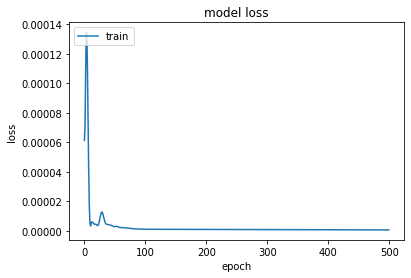

In [65]:

#model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=500,  
          verbose=1,
          validation_data=(X_test, y_test))

print(history.history.keys())


#  loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


model.save('model.h5')

In [0]:
result=model.predict(X_test)

In [67]:
result

array([[ 0.00074535],
       [-0.00168527],
       [ 0.00095186],
       [ 0.00074535],
       [ 0.00119218],
       [ 0.00326217],
       [-0.00156778],
       [ 0.00074535],
       [-0.00031599],
       [ 0.00074535],
       [ 0.00318054],
       [ 0.00117476]], dtype=float32)

In [68]:
X_test

array([[0.08, 0.09, 0.08],
       [0.51, 0.03, 0.09],
       [0.75, 0.28, 0.  ],
       [0.1 , 0.12, 0.12],
       [0.13, 0.09, 0.11],
       [0.11, 0.03, 0.14],
       [0.52, 0.01, 0.08],
       [0.1 , 0.6 , 0.09],
       [0.81, 0.07, 0.18],
       [0.05, 0.07, 0.01],
       [0.14, 0.03, 0.16],
       [0.13, 0.08, 0.1 ]])

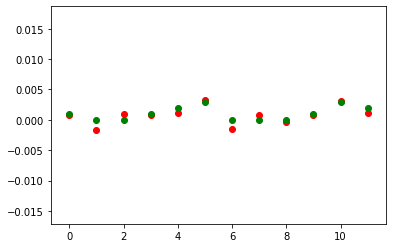

In [71]:
plt.scatter(range(12),result,c='r')
plt.scatter(range(12),y_test,c='g')
plt.show()

In [73]:
y_test

array([0.001, 0.   , 0.   , 0.001, 0.002, 0.003, 0.   , 0.   , 0.   ,
       0.001, 0.003, 0.002])

In [74]:
np.round(y_predict)

NameError: ignored